In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, callbacks

from sklearn import metrics

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
df_train = data.sample(frac=0.8, random_state=11)
df_valid = data.drop(df_train.index)

In [5]:
max_ = df_train.max(axis=0)
max_

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [6]:
min_ = df_train.min(axis=0)
min_

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [7]:
scaled_train = (df_train - min_) / (max_ - min_)
scaled_valid = (df_valid - min_) / (max_ - min_)

scaled_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1429,0.292035,0.041096,0.40,0.089041,0.061770,0.521127,0.215548,0.435389,0.464567,0.359281,0.446154,0.4
260,0.292035,0.143836,0.23,0.054795,0.108514,0.239437,0.137809,0.453744,0.433071,0.191617,0.138462,0.4
916,0.061947,0.407534,0.19,0.041096,0.248748,0.084507,0.197880,0.284875,0.692913,0.167665,0.400000,0.4
1141,0.318584,0.178082,0.32,0.109589,0.113523,0.323944,0.229682,0.453010,0.417323,0.311377,0.400000,0.6
1574,0.088496,0.130137,0.78,0.890411,0.103506,0.309859,0.303887,0.491924,0.511811,0.089820,0.323077,0.6


In [8]:
y_train = scaled_train['quality']
y_valid = scaled_valid['quality']

In [9]:
scaled_valid.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
10,0.185841,0.315068,0.08,0.061644,0.141903,0.197183,0.208481,0.428047,0.425197,0.125749,0.123077,0.4
15,0.380531,0.342466,0.19,0.205479,0.263773,0.704225,0.501767,0.626285,0.338583,0.359281,0.123077,0.4
17,0.309735,0.301370,0.28,0.054795,0.594324,0.211268,0.176678,0.494126,0.291339,0.568862,0.138462,0.4


In [10]:
y_train.head()

1429    0.4
260     0.4
916     0.4
1141    0.6
1574    0.6
Name: quality, dtype: float64

In [11]:
y_valid.head()

0     0.4
1     0.4
10    0.4
15    0.4
17    0.4
Name: quality, dtype: float64

In [12]:
X_train, X_valid = scaled_train.drop('quality', axis=1), scaled_valid.drop('quality', axis=1)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1429,0.292035,0.041096,0.40,0.089041,0.061770,0.521127,0.215548,0.435389,0.464567,0.359281,0.446154
260,0.292035,0.143836,0.23,0.054795,0.108514,0.239437,0.137809,0.453744,0.433071,0.191617,0.138462
916,0.061947,0.407534,0.19,0.041096,0.248748,0.084507,0.197880,0.284875,0.692913,0.167665,0.400000
1141,0.318584,0.178082,0.32,0.109589,0.113523,0.323944,0.229682,0.453010,0.417323,0.311377,0.400000
1574,0.088496,0.130137,0.78,0.890411,0.103506,0.309859,0.303887,0.491924,0.511811,0.089820,0.323077


In [13]:
X_valid.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
10,0.185841,0.315068,0.08,0.061644,0.141903,0.197183,0.208481,0.428047,0.425197,0.125749,0.123077
15,0.380531,0.342466,0.19,0.205479,0.263773,0.704225,0.501767,0.626285,0.338583,0.359281,0.123077
17,0.309735,0.301370,0.28,0.054795,0.594324,0.211268,0.176678,0.494126,0.291339,0.568862,0.138462


In [14]:
X_train.shape

(1279, 11)

## The Neural Network

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation = 'relu', input_shape=[11]),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1)
])

### Set how training will take place 

In [16]:
model.compile(optimizer='adam', loss = 'mae')

@ Prevent Underfitting and Overfitting 
> Using EarlyStopping

In [17]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

> Training the Network

In [18]:
model_data = model.fit(X_train, y_train,
          validation_data = (X_valid, y_valid),
          batch_size = 128,
          epochs = 300,
          callbacks = [early_stopping]
         )

Epoch 1/300
10/10 [==============================] - 1s 50ms/step - loss: 0.5334 - val_loss: 0.4522
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 0.3938 - val_loss: 0.3036
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 0.2462 - val_loss: 0.1673
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1550 - val_loss: 0.1470
Epoch 5/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1512 - val_loss: 0.1489
Epoch 6/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1425 - val_loss: 0.1340
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1356 - val_loss: 0.1281
Epoch 8/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1299 - val_loss: 0.1244
Epoch 9/300
10/10 [==============================] - 0s 8ms/step - loss: 0.1253 - val_loss: 0.1213
Epoch 10/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1212 - val_loss: 0.1174
Epoch 11

Epoch 83/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0930 - val_loss: 0.0988
Epoch 84/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0926 - val_loss: 0.0983
Epoch 85/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0926 - val_loss: 0.0984
Epoch 86/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0930 - val_loss: 0.0984
Epoch 87/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0930 - val_loss: 0.0983
Epoch 88/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0923 - val_loss: 0.0978
Epoch 89/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0923 - val_loss: 0.0978
Epoch 90/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0921 - val_loss: 0.0976
Epoch 91/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0920 - val_loss: 0.0978
Epoch 92/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0920 - val_loss: 0.0979


In [19]:
history = model_data.history
history['loss'][:10], history['val_loss'][:10]

([0.533362627029419,
  0.39379677176475525,
  0.2462053894996643,
  0.15504537522792816,
  0.15115047991275787,
  0.14249221980571747,
  0.13556593656539917,
  0.1299198716878891,
  0.1253117322921753,
  0.12120620161294937],
 [0.4521583616733551,
  0.3035896420478821,
  0.16734065115451813,
  0.14698944985866547,
  0.14892521500587463,
  0.1339825987815857,
  0.12814882397651672,
  0.1244249939918518,
  0.12126114219427109,
  0.11740005016326904])

In [20]:
hist_df = pd.DataFrame(history)
hist_df.head()

,loss,val_loss
0,0.533363,0.452158
1,0.393797,0.303590
2,0.246205,0.167341
3,0.155045,0.146989
4,0.151150,0.148925


<AxesSubplot:>

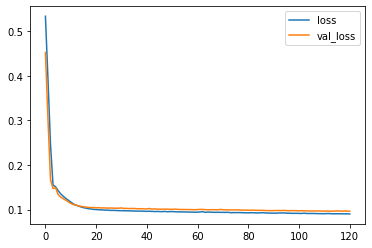

In [21]:
hist_df.plot()

In [22]:
preds = model.predict(X_valid)
score = metrics.mean_absolute_error(preds, y_valid)
print(f"MAE >> {score}")

MAE >> 0.09702387779951095
